## Use cartopy instead of baseplot
- Also find a faster method of converting postcodes? Currently use geocoder


In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs # for mapping
import ast
from geopy.geocoders import GoogleV3
import time

In [91]:
geolocator = GoogleV3()
location = geolocator.geocode('GU3 3EE')
print(location.address)
print((location.latitude, location.longitude))

Baird Dr, Wood Street Village, Guildford GU3 3EE, UK
(51.2486717, -0.6298129)


In [105]:
def get_lat_long(postcode):
    location = geolocator.geocode(postcode)
    time.sleep(0.1) # 10/sec
    return {'latitude':location.latitude,'longitude':location.longitude}

In [106]:
test123 = get_lat_long('GU3 3EE')
test123

{'latitude': 51.2486717, 'longitude': -0.6298129}

In [107]:
file = 'Data to Import\postcodes\postcodes.xlsx'
postcodes = pd.read_excel(file)
postcodes.head(3)

,Centre ID,PostCode
0,1,CB2 0QQ
1,2,CH63 4JY
2,3,HU3 2JZ


In [113]:
## loop through each row and get lat and long in 2 lists
lats = []
lngs = []
for postcode in postcodes['PostCode']:
    result = get_lat_long(postcode)
    #print(result)
    lat = result['latitude']
    lng = result['longitude']
    lats.append(lat)
    lngs.append(lng)

## add the lat and lng to the df
postcodes['lat']=lats
postcodes['lng']=lngs
postcodes.head(3)

,Centre ID,PostCode,lat,lng
0,1,CB2 0QQ,52.175060,0.141723
1,2,CH63 4JY,53.332267,-3.025849
2,3,HU3 2JZ,53.744412,-0.358271


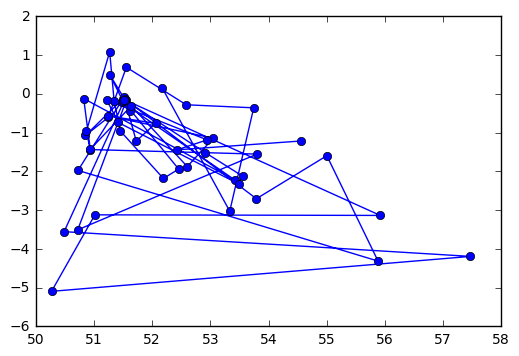

In [112]:
plt.plot(postcodes['lat'],postcodes['lng'], marker='o')
plt.show()
## looks approx correct...

C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:492: UserWarning: This method has been deprecated. Please use `add_feature` instead.
  warnings.warn('This method has been deprecated.'


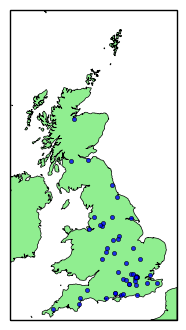

In [209]:
#AzimuthalEquidistant
#OSGB
#PlateCarree

ax = plt.axes(projection=ccrs.OSGB())
#ax.coastlines(resolution='10m')
#ax.stock_img()
ax.natural_earth_shp(resolution='10m',facecolor='lightgreen',edgecolor='black',lw=0.5)
#ax.set_xlim(-11,3)
#ax.set_ylim(50,60)
ax.set_global() # set the extend of the map to the default for OSGB
## should be able to edit this to change colours or marker size depending on the amount/type of data - but need to include this in the dataframe
plt.plot(postcodes['lng'],postcodes['lat'],ls='',marker='o',ms=3,alpha=0.8,transform=cartopy.crs.PlateCarree())
#plt.savefig('test.png',dpi=1000, bbox_inches='tight')
plt.show()

C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:492: UserWarning: This method has been deprecated. Please use `add_feature` instead.
  warnings.warn('This method has been deprecated.'


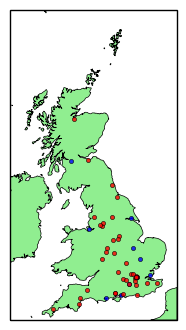

In [217]:
## can customise the points plotted based on other values - need ot add to the dateframe to use

ax = plt.axes(projection=ccrs.OSGB())
#ax.coastlines(resolution='10m')
#ax.stock_img()
ax.natural_earth_shp(resolution='10m',facecolor='lightgreen',edgecolor='black',lw=0.5)
ax.set_global() # set the extend of the map to the default for OSGB
## should be able to edit this to change colours or marker size depending on the amount/type of data - but need to include this in the dataframe
for i in postcodes['Centre ID']:
    data = postcodes[postcodes['Centre ID']==i]
    if i <=10:
        marker_color = 'blue'
    else:
        marker_color='red'
    plt.plot(data['lng'],data['lat'],ls='',marker='o',ms=3, color=marker_color,alpha=0.8,transform=cartopy.crs.PlateCarree())
#plt.savefig('test.png',dpi=1000)
plt.show()